In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv('/Users/dynaneshwarijangale/Downloads/Tennis.csv')
print(df)

   Attributes     Groups                        Values
0     BallPos    Serving  Right Section of Middle Road
1         NaN        NaN                    Right Zone
2         NaN        NaN   Left Section of Middle Road
3         NaN        NaN                     Left Zone
4         NaN        NaN  Outside Corner of Right Zone
..        ...        ...                           ...
59       Spin    Up spin                      Top Spin
60        NaN    No spin                      Flat Hit
61        NaN  Down spin                     Down Spin
62        NaN     Others                    Data Error
63        NaN        NaN                         Score

[64 rows x 3 columns]


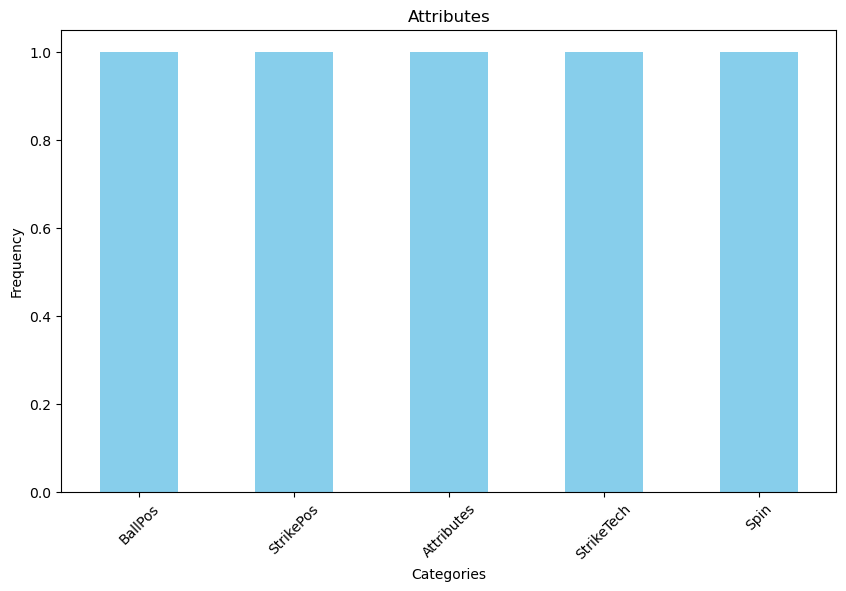

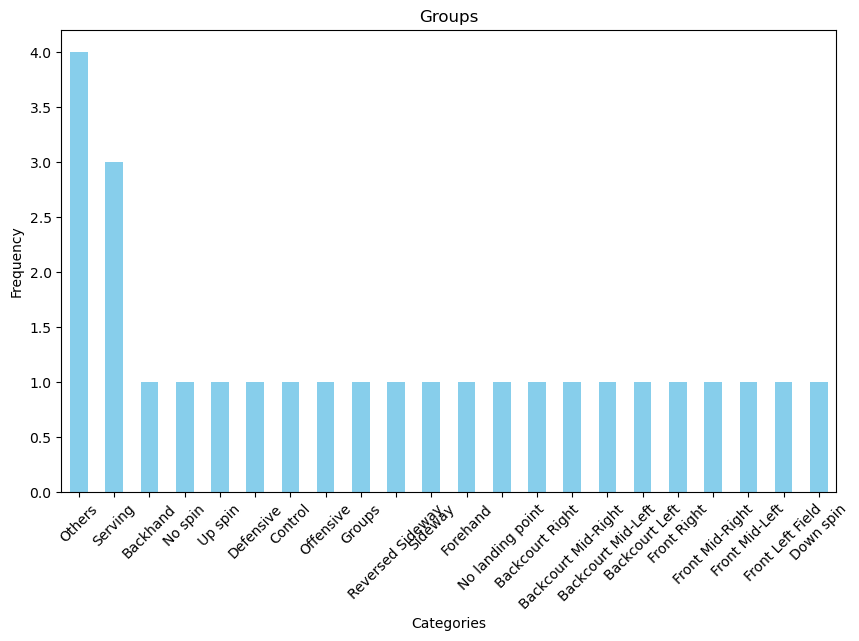

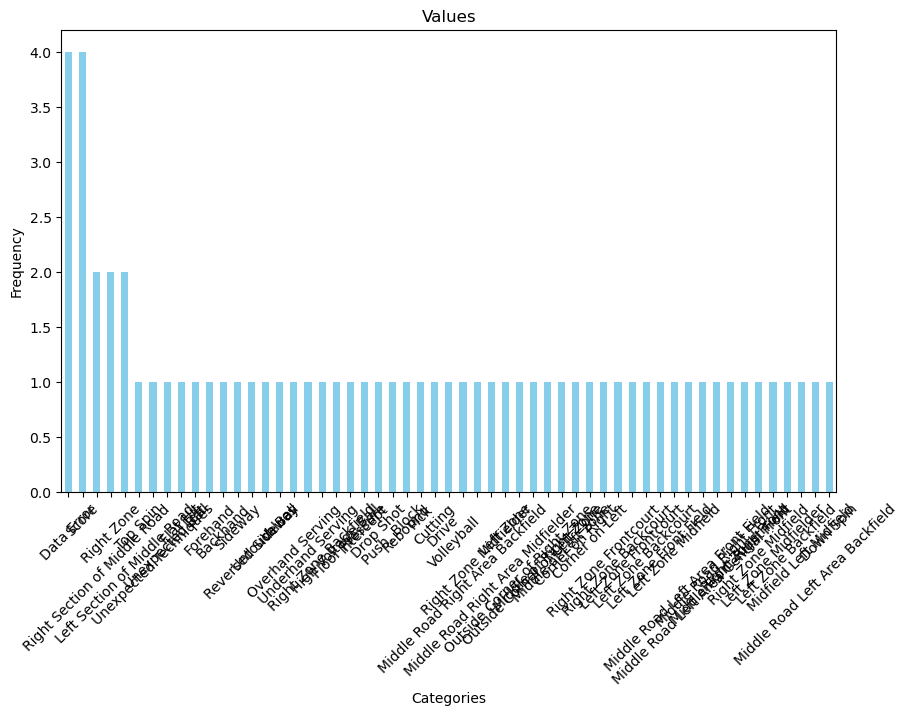

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

attributes = df.columns
for attribute in attributes:
    plt.figure(figsize=(10, 6))
    df[attribute].value_counts().plot(kind='bar', color='skyblue')
    plt.title(attribute)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


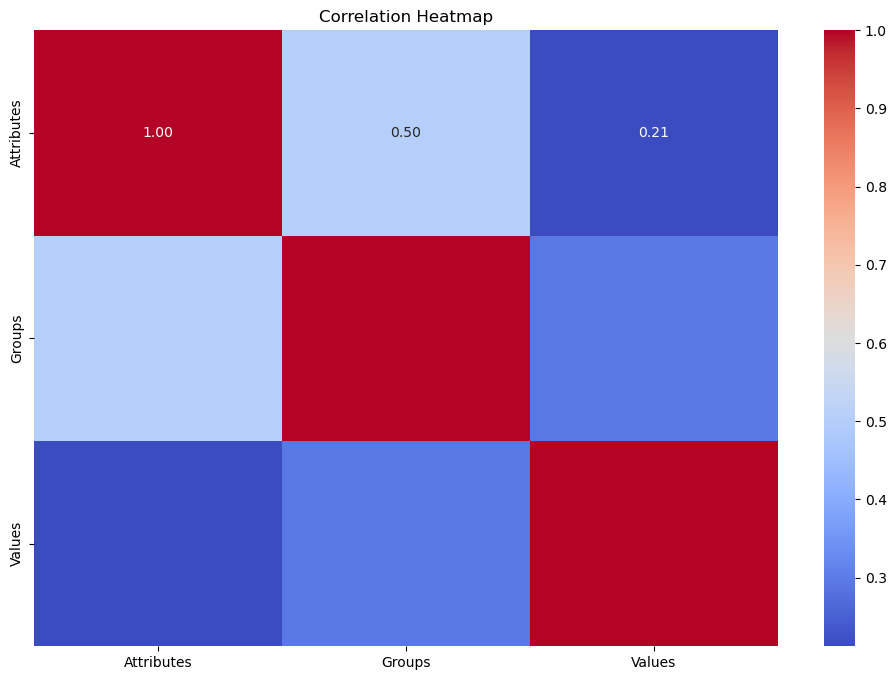

In [4]:
import seaborn as sns

df_encoded = df.apply(lambda x: x.astype('category').cat.codes)

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


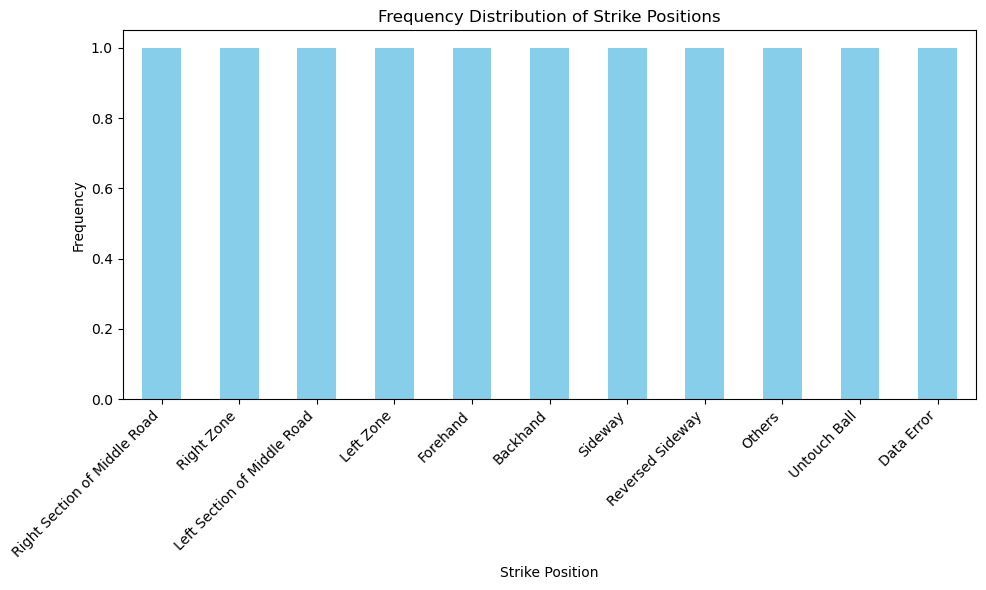

Summary:
Values
Right Section of Middle Road    1
Right Zone                      1
Left Section of Middle Road     1
Left Zone                       1
Forehand                        1
Backhand                        1
Sideway                         1
Reversed Sideway                1
Others                          1
Untouch Ball                    1
Data Error                      1
Name: count, dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Attributes': ['StrikePos'] * 11,
    'Groups': ['Serving', 'Serving', 'Serving', 'Serving', 'Forehand', 'Forehand', 
               'Forehand', 'Forehand', 'Forehand', 'Others', 'Others'],
    'Values': ['Right Section of Middle Road', 'Right Zone', 'Left Section of Middle Road', 
               'Left Zone', 'Forehand', 'Backhand', 'Sideway', 'Reversed Sideway', 
               'Others', 'Untouch Ball', 'Data Error']
}
df = pd.DataFrame(data)

value_counts = df['Values'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Strike Positions')
plt.xlabel('Strike Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Summary:")
print(value_counts)


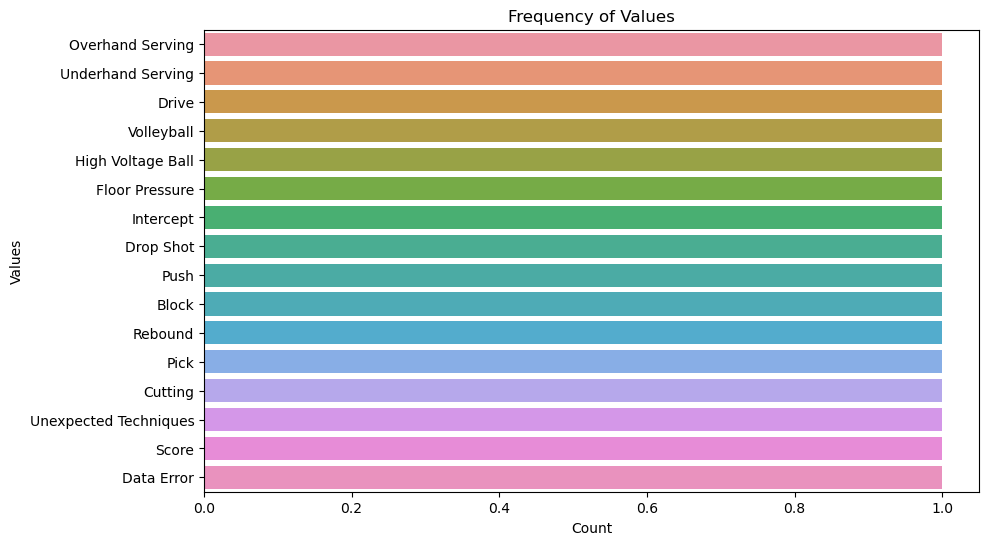

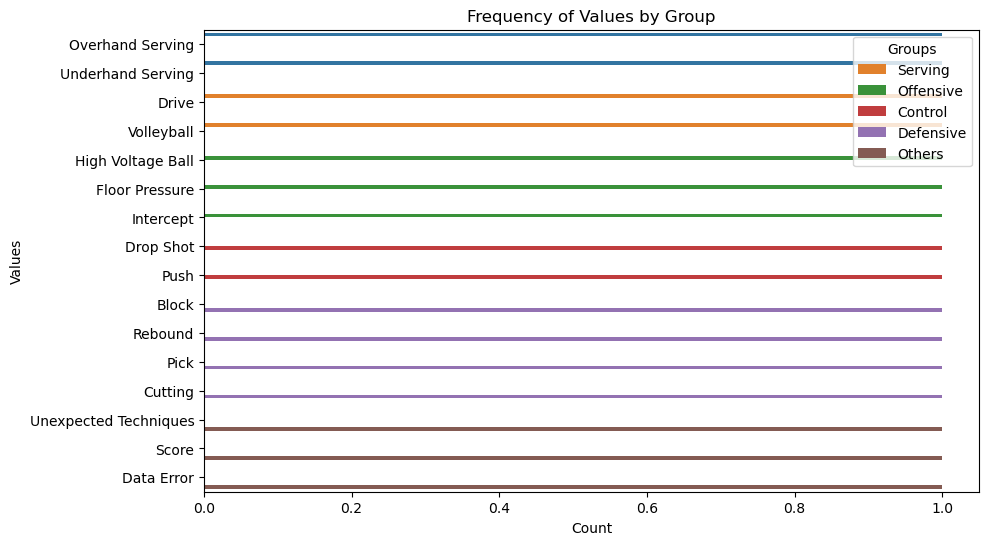

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Attributes': ['StrikeTech'] * 2 + ['Serving'] * 2 + ['Offensive'] * 3 + ['Control'] * 2 + ['Defensive'] * 4 + ['Others'] * 3,
    'Groups': ['' , '', 'Serving', 'Serving', 'Offensive', 'Offensive', 'Offensive', 'Control', 'Control', 'Defensive', 'Defensive', 'Defensive', 'Defensive', 'Others', 'Others', 'Others'],
    'Values': ['Overhand Serving', 'Underhand Serving', 'Drive', 'Volleyball', 'High Voltage Ball', 'Floor Pressure', 'Intercept', 'Drop Shot', 'Push', 'Block', 'Rebound', 'Pick', 'Cutting', 'Unexpected Techniques', 'Score', 'Data Error']
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.countplot(y='Values', data=df)
plt.title('Frequency of Values')
plt.xlabel('Count')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='Values', hue='Groups', data=df)
plt.title('Frequency of Values by Group')
plt.xlabel('Count')
plt.ylabel('Values')
plt.legend(title='Groups')
plt.show()


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Attributes  5 non-null      object
 1   Groups      5 non-null      object
 2   Values      5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes
None

Descriptive Statistics:
       Attributes   Groups    Values
count           5        5         5
unique          2        5         5
top          Spin  Up spin  Top Spin
freq            4        1         1

Missing Values:
Attributes    0
Groups        0
Values        0
dtype: int64


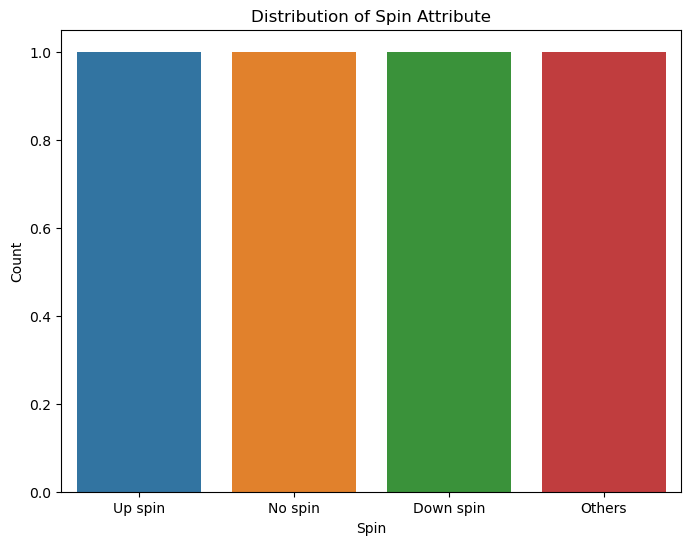

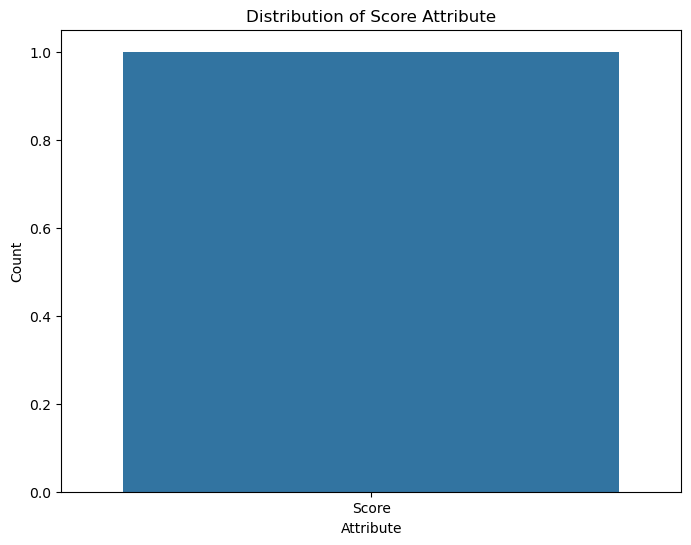

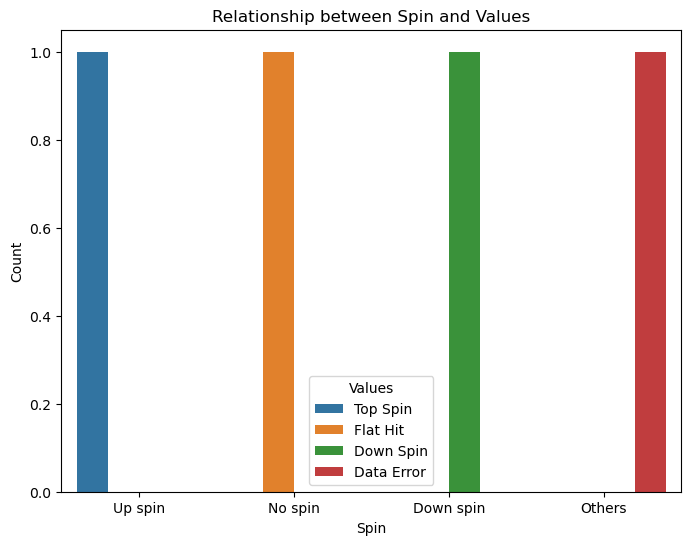

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "Attributes": ["Spin"] * 4 + ["Score"],
    "Groups": ["Up spin", "No spin", "Down spin", "Others", ""],
    "Values": ["Top Spin", "Flat Hit", "Down Spin", "Data Error", ""]
}
df = pd.DataFrame(data)

print("Basic Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

plt.figure(figsize=(8, 6))
sns.countplot(data=df[df['Attributes'] == 'Spin'], x='Groups')
plt.title("Distribution of Spin Attribute")
plt.xlabel("Spin")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df[df['Attributes'] == 'Score'], x='Attributes')
plt.title("Distribution of Score Attribute")
plt.xlabel("Attribute")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df[df['Attributes'] == 'Spin'], x='Groups', hue='Values')
plt.title("Relationship between Spin and Values")
plt.xlabel("Spin")
plt.ylabel("Count")
plt.legend(title='Values')
plt.show()


In [8]:
def encode_one_hot(data):
    ball_pos_values = [
        "Right Section of Middle Road", "Right Zone", "Left Section of Middle Road",
        "Left Zone", "Outside Corner of Right Zone", "Outside Corner of Left Zone",
        "Middle of Right Zone", "Middle of Left zone", "Corner on Right", "Corner on Left",
        "Right Zone Frontcourt", "Right Zone Backcourt", "Left Zone Frontcourt",
        "Left Zone Backcourt", "Left Zone Front Field", "Left Zone Midfield",
        "Middle Road Left Area Front Field", "Middle Road Left Area Central Front",
        "Middle Road Right Front", "Middle Front Right Field", "Right Zone Front",
        "Right Zone Midfield", "Left Zone Midfielder", "Left Zone Backfield",
        "Midfield Left Midfield", "Middle Road Left Area Backfield",
        "Middle Road Right Area Midfielder", "Middle Road Right Area Backfield",
        "Right Zone Midfielder", "Right Zone Backfield", "Unexpected Ball", "Score",
        "Data Error"
    ]
    strike_pos_values = [
        "Right Section of Middle Road", "Right Zone", "Left Section of Middle Road",
        "Left Zone", "Forehand", "Backhand", "Sideway", "Reversed Sideway",
        "Untouch Ball", "Score", "Data Error"
    ]
    strike_tech_values = [
        "Overhand Serving", "Underhand Serving", "Drive", "Volleyball", "High Voltage Ball",
        "Floor Pressure", "Intercept", "Drop Shot", "Push, Block", "Rebound", "Pick", "Cutting",
        "Unexpected Techniques", "Score", "Data Error"
    ]
    spin_values = ["Top Spin", "Flat Hit", "Down Spin", "Data Error", "Score"]

    encoded_data = []

    for row in data:
        encoded_row = []

        for value in ball_pos_values:
            if row["BallPos"] == value:
                encoded_row.append(1)
            else:
                encoded_row.append(0)

        for value in strike_pos_values:
            if row["StrikePos"] == value:
                encoded_row.append(1)
            else:
                encoded_row.append(0)

        for value in strike_tech_values:
            if row["StrikeTech"] == value:
                encoded_row.append(1)
            else:
                encoded_row.append(0)

        for value in spin_values:
            if row["Spin"] == value:
                encoded_row.append(1)
            else:
                encoded_row.append(0)

        encoded_data.append(encoded_row)

    return encoded_data


data = [
    {"BallPos": "Right Zone", "StrikePos": "Forehand", "StrikeTech": "Drive", "Spin": "Top Spin"},
    {"BallPos": "Left Zone", "StrikePos": "Backhand", "StrikeTech": "Volleyball", "Spin": "Flat Hit"},
    {"BallPos": "Left Zone Backcourt", "StrikePos": "Forehand", "StrikeTech": "Push, Block", "Spin": "Down Spin"},
]

encoded_data = encode_one_hot(data)

for row in encoded_data:
    print(row)


[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [9]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples = len(X)
        n_features = len(X[0]) if n_samples > 0 else 0
        n_labels = len(set(y))

        if n_labels == 1:
            return {'class': y[0]}

        if (self.max_depth is not None and depth >= self.max_depth) or n_samples <= 1:
            return {'class': max(set(y), key=y.count)}

        best_gini = float('inf')
        best_split_feature = None
        best_split_value = None
        for feature in range(n_features):
            feature_values = set(x[feature] for x in X)
            for value in feature_values:
                left_indices = [i for i, val in enumerate(X) if val[feature] <= value]
                right_indices = [i for i, val in enumerate(X) if val[feature] > value]
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                gini = self._gini_impurity([y[i] for i in left_indices], [y[i] for i in right_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_split_feature = feature
                    best_split_value = value

        if best_gini == float('inf'):
            return {'class': max(set(y), key=y.count)}

        left_indices = [i for i, val in enumerate(X) if val[best_split_feature] <= best_split_value]
        right_indices = [i for i, val in enumerate(X) if val[best_split_feature] > best_split_value]

        left_subtree = self._grow_tree([X[i] for i in left_indices], [y[i] for i in left_indices], depth + 1)
        right_subtree = self._grow_tree([X[i] for i in right_indices], [y[i] for i in right_indices], depth + 1)

        return {'feature': best_split_feature,
                'value': best_split_value,
                'left': left_subtree,
                'right': right_subtree}

    def predict(self, X):
        return [self._predict_sample(x, self.tree) for x in X]

    def _predict_sample(self, x, node):
        if 'class' in node:
            return node['class']
        if x[node['feature']] <= node['value']:
            return self._predict_sample(x, node['left'])
        else:
            return self._predict_sample(x, node['right'])

    def _gini_impurity(self, left_labels, right_labels):
        n_left = len(left_labels)
        n_right = len(right_labels)
        n_total = n_left + n_right

        p_left = n_left / n_total
        p_right = n_right / n_total

        gini_left = 1 - sum((left_labels.count(label) / n_left) ** 2 for label in set(left_labels))
        gini_right = 1 - sum((right_labels.count(label) / n_right) ** 2 for label in set(right_labels))

        gini_impurity = p_left * gini_left + p_right * gini_right
        return gini_impurity


X_train = [[0, 0], [1, 1], [2, 2], [3, 3]]
y_train = [0, 1, 0, 1]

tree = DecisionTree(max_depth=2)
tree.fit(X_train, y_train)

X_test = [[0.5, 0.5], [2.5, 2.5]]
predictions = tree.predict(X_test)
print(predictions)  

[1, 0]


In [10]:
X_test = [[0, 0], [3, 3]]

y_true = [0, 1]

predictions = tree.predict(X_test)

correct_predictions = sum(1 for pred, true in zip(predictions, y_true) if pred == true)
accuracy = correct_predictions / len(y_true)

print("Accuracy:", accuracy)


Accuracy: 0.5
